In [1]:
# Define precipitation time series (replace as needed)
time = list(range(25))
increment = [0.121, 0.121, 0.132, 0.154, 0.165, 0.187, 0.198, 0.242, 0.297,
             0.374, 0.594, 4.708, 1.199, 0.528, 0.374, 0.286, 0.253, 0.209,
             0.176, 0.154, 0.132, 0.132, 0.132, 0.132, 0]

# Compute accumulated precipitation
accumulate = [0 for _ in range(len(time))]
for i in range(1, len(time)):
    accumulate[i] = accumulate[i-1] + increment[i-1]


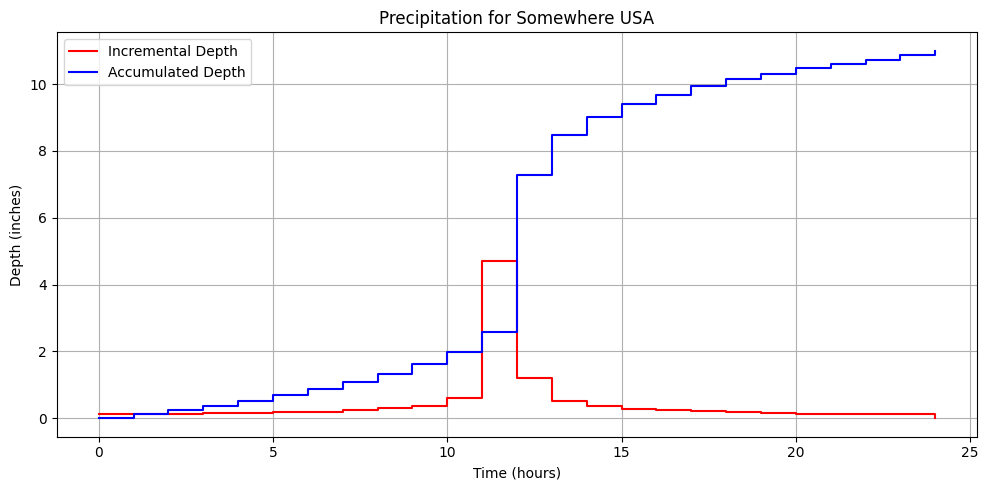

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(time, increment, c='red', drawstyle='steps-post', label='Incremental Depth')
plt.plot(time, accumulate, c='blue', drawstyle='steps-post', label='Accumulated Depth')
plt.xlabel('Time (hours)')
plt.ylabel('Depth (inches)')
plt.title('Precipitation for Somewhere USA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.chart import LineChart, Reference
from openpyxl.utils.dataframe import dataframe_to_rows

# Create DataFrame
df = pd.DataFrame({
    "Time (hr)": time,
    "Incremental Depth (in)": increment,
    "Accumulated Depth (in)": accumulate
})

# Write to Excel
from openpyxl import Workbook
wb = Workbook()
ws = wb.active
ws.title = "Precipitation Data"

# Write rows
for r in dataframe_to_rows(df, index=False, header=True):
    ws.append(r)

# Add chart
chart = LineChart()
chart.title = "Precipitation for Somewhere USA"
chart.style = 13
chart.y_axis.title = 'Depth (inches)'
chart.x_axis.title = 'Time (hours)'
data = Reference(ws, min_col=2, min_row=1, max_col=3, max_row=len(df)+1)
cats = Reference(ws, min_col=1, min_row=2, max_row=len(df)+1)
chart.add_data(data, titles_from_data=True)
chart.set_categories(cats)
ws.add_chart(chart, "E5")

# Save file
excel_output_path = "precipitation_output.xlsx"
wb.save(excel_output_path)
print(f"Excel file saved as: {excel_output_path}")


Excel file saved as: precipitation_output.xlsx


In [4]:
# Python port of FORTRAN program to interpolate rain/runoff data to 1-minute intervals

def interpolate_rainfall(input_lines):
    etime = []
    acc_wtd_value = []

    # Read and parse data
    for line in input_lines:
        line = line.strip()
        if line.startswith("#") or len(line.strip()) == 0:
            continue
        parts = line.split()
        if len(parts) == 2:
            etime.append(float(parts[0]))
            acc_wtd_value.append(float(parts[1]))

    # Round time to nearest whole minute
    for i in range(1, len(etime)): 
        etime[i]=round(etime[i],0) # round to nearest whole number as float

    # Interpolate values
    interpolated = []
    for i in range(1, len(etime)):
        t0, t1 = etime[i - 1], etime[i]
        v0, v1 = acc_wtd_value[i - 1], acc_wtd_value[i]
        slope = (v1 - v0) / (t1 - t0)

        rtime = t0
        while rtime < t1:
            value = v0 + slope * (rtime - t0)
            interpolated.append((round(rtime, 6), round(value, 6)))
            rtime += 1.0

    return interpolated


if __name__ == "__main__":
    # Example input: could be replaced with reading from a file
    sample_data = """# Time Depth
0.0 0.00
3.9 1.20
7.0 2.40
10.0 3.00
11.0 3.00
"""
# Remember to pad the data so last line is one minute more that actual last line of data

    lines = sample_data.strip().split("\n")
    results = interpolate_rainfall(lines)

    import pandas as pd
    df = pd.DataFrame(results, columns=["Time (min)", "Interpolated Value"])
    df.to_csv("interpolated_output.csv", index=False)
    print("Saved interpolated data to interpolated_output.csv")
    print(df)

Saved interpolated data to interpolated_output.csv
    Time (min)  Interpolated Value
0          0.0                 0.0
1          1.0                 0.3
2          2.0                 0.6
3          3.0                 0.9
4          4.0                 1.2
5          5.0                 1.6
6          6.0                 2.0
7          7.0                 2.4
8          8.0                 2.6
9          9.0                 2.8
10        10.0                 3.0


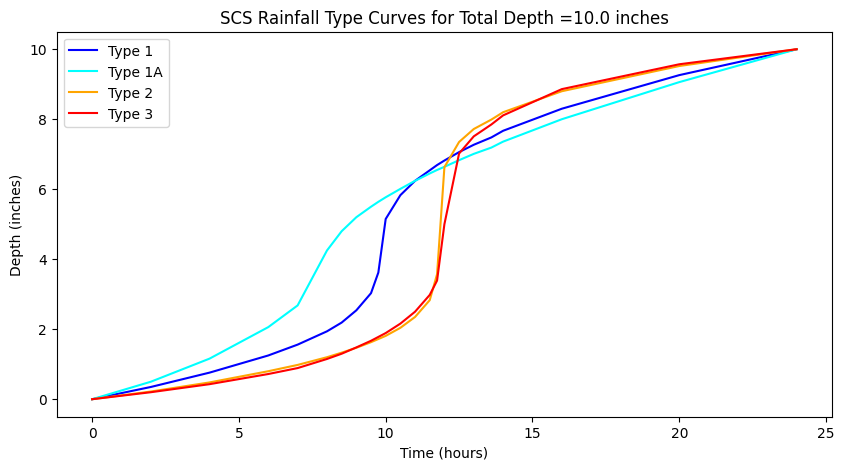

In [5]:
# SCS Type Curves

hour = [0,2,4,6,7,8,8.5,9,9.5,9.75,10,10.5,11,11.5,11.75,12,12.5,13.0,13.6,14,16,20,24]
type1 = [0,0.035,0.076,0.125,0.156,0.194,0.219,0.254,0.303,0.362,0.515,0.583,0.624,0.654,0.669,0.682,0.706,0.727,0.748,0.767,0.83,0.926,1]
type1A = [0,0.05,0.116,0.206,0.268,0.425,0.48,0.52,0.55,0.564,0.577,0.601,0.624,0.645,0.655,0.664,0.683,0.701,0.719,0.736,0.8,0.906,1]
type2 = [0,0.022,0.048,0.08,0.098,0.12,0.133,0.147,0.163,0.172,0.181,0.204,0.235,0.283,0.357,0.663,0.735,0.772,0.799,0.82,0.88,0.952,1]
type3 = [0,0.02,0.043,0.072,0.089,0.115,0.13,0.148,0.167,0.178,0.189,0.216,0.25,0.298,0.339,0.5,0.702,0.751,0.785,0.811,0.886,0.957,1]

t24  =[]
for i in range(len(hour)):
    t24.append(hour[i]/24.0)

# dimensionalize

Ptotal = 10.0
T1D =[0 for i in range(len(hour))]
T1AD =[0 for i in range(len(hour))]
T2D =[0 for i in range(len(hour))]
T3D =[0 for i in range(len(hour))]
for i in range(len(hour)):
    T1D[i]=Ptotal*type1[i]
    T1AD[i]=Ptotal*type1A[i]
    T2D[i]=Ptotal*type2[i]
    T3D[i]=Ptotal*type3[i]
#plot

import matplotlib.pyplot as plt # the python plotting library
plottitle ='SCS Rainfall Type Curves for Total Depth =' + str(Ptotal) +' inches'
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(hour, T1D, c='blue') # step plot
plt.plot(hour, T1AD, c='cyan') # step plot
plt.plot(hour, T2D, c='orange') # step plot
plt.plot(hour, T3D, c='red') # step plot
#plt.plot(time, accumulate, c='blue',drawstyle='steps') # step plot
plt.xlabel('Time (hours)')
plt.ylabel('Depth (inches)')
plt.legend(['Type 1','Type 1A','Type 2','Type 3'])
plt.title(plottitle)
plt.show()


In [6]:
# Missing Precipitation Estimation
def station_average(precip_known):
    ''' precip_known is known stations data as a list'''
    how_many = len(precip_known)
    station_average = sum(precip_known)/float(how_many)
    return station_average
def normal_ratio(precip_known,normal_all):
    ''' precip_known is known stations data as a list
        normal_all is all stations normal rainfall depths
        missing station is assumed last element in normal_all list'''
    how_many = len(precip_known)  
    nr = [0 for i in range(how_many)]
    for i in range(how_many):
        nr[i]=precip_known[i]/normal_all[i]
    normal_average = (sum(nr)/float(how_many))*normal_all[-1]
    return normal_average

In [7]:
# Input Data
precip_known = [91.11, 72.23, 79.89]
normal_all = [80.97, 67.59, 76.28, 92.01] 
# Find differences for normal values
diff = [0 for i in range(len(normal_all)-1)]
for i in range(len(diff)):
    diff[i]=normal_all[-1]-normal_all[i] # raw difference assume last entry is missing station
percent_max = 100.0*max(diff)/normal_all[-1]
if percent_max <=10.0:
    missing_pee = station_average(precip_known)
    print("Use Station Average Method")
    print("Missing Depth : ",round(missing_pee,2)," cm")
else:
    missing_pee = normal_ratio(precip_known,normal_all)
    print("Use Normal Ratio Method")
    print("Missing Depth : ",round(missing_pee,2)," cm")


Use Normal Ratio Method
Missing Depth :  99.41  cm
